In [95]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
import plotly.express as px

In [96]:
current_directory = os.getcwd()
file_name_ped = 'Weekly_Cumulative_Influenza_Vaccination_Coverage__Children_6_months_through_17_years__United_States_20240826.csv'
file_path_ped = os.path.join(current_directory, file_name_ped)

df_ped = pd.read_csv(file_path_ped)

In [97]:
file_name_adult = 'Weekly_Cumulative_Influenza_Vaccination_Coverage__Adults_18_and_Older__United_States_20240826.csv'
file_path_adult = os.path.join(current_directory, file_name_adult)

df_adult = pd.read_csv(file_path_adult)

In [98]:
df_ped.columns.sort_values()
df_adult.columns.sort_values()

Index(['95 CI (%)', 'CI_Half_width_95pct', 'Current_Season_Week_Ending',
       'Demographic_Level', 'Demographic_Level_Sort', 'Demographic_Name',
       'Demographic_Name_Sort', 'Geographic_Level', 'Geographic_Name',
       'Geographic_Sort', 'Indicator_Category_Label',
       'Indicator_Category_Label_Sort', 'Indicator_Label', 'Influenza_Season',
       'Legend', 'Legend_Sort', 'Month_Week', 'ND_Weekly_Estimate',
       'Season_Sort', 'Suppression_Flag', 'Week_Ending', 'n_unweighted'],
      dtype='object')

In [99]:
df_ped.rename(columns={
        'CI_HalfWidth': 'CI_Half_width_95pct',
        'Current_Season_Week_Ending_Label': 'Current_Season_Week_Ending',
        'Demographic_Level_Sort_Order': 'Demographic_Level_Sort',
        'Demographic_Name_Sort_Order': 'Demographic_Name_Sort',
        'Geography_Level': 'Geographic_Level',
        'Geography_Name': 'Geographic_Name',
        'geography_level_sort_order': 'Geographic_Sort',
        'Indicator Category Label': 'Indicator_Category_Label',
        'Legend_Label': 'Legend',
        'Point_Estimate': 'ND_Weekly_Estimate'
        }, inplace=True)
        
df = pd.concat([df_adult,df_ped],ignore_index=True)

In [100]:
df.head()

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,...,Legend,95 CI (%),Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.8,7.8784,...,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,4.0,1,1,14,3,3140101,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.8,4.1669,...,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,2.0,1,1,14,3,3140101,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.3,7.6134,...,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,3.0,1,1,14,3,3140101,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,1.0,1,1,14,3,3140101,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,NaN,1,1,14,3,3140101,NaN,NaN


In [101]:
df.describe()

,ND_Weekly_Estimate,CI_Half_width_95pct,n_unweighted,Suppression_Flag,Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
count,21508.000000,21508.000000,21781.000000,21787.000000,13279.000000,21795.000000,21795.000000,21795.000000,21795.000000,2.179500e+04,4.262000e+03,4262.000000
mean,24.381323,3.944203,20764.399293,0.012852,2.360494,3.257674,7.276669,20.151594,2.484607,2.738392e+06,7.218916e+06,29.062881
std,18.071029,3.230457,58628.106300,0.112637,1.150496,3.902541,10.944091,23.454169,0.850740,8.736971e+05,1.203024e+07,24.312491
min,0.000000,0.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.010101e+06,1.205700e+04,1.000000
25%,6.200000,1.793500,559.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.011332e+06,6.941355e+05,2.000000
50%,24.500000,3.055150,2777.000000,0.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.011332e+06,1.931946e+06,27.000000
75%,39.800000,5.013050,10186.000000,0.000000,3.000000,4.000000,11.000000,39.000000,3.000000,3.350101e+06,8.654925e+06,50.000000
max,78.400000,51.219300,437204.000000,1.000000,4.000000,14.000000,39.000000,74.000000,3.000000,3.740101e+06,7.060927e+07,74.000000


In [102]:
df.columns

Index(['Geographic_Level', 'Geographic_Name', 'Demographic_Level',
       'Demographic_Name', 'Indicator_Label', 'Indicator_Category_Label',
       'Month_Week', 'Week_Ending', 'ND_Weekly_Estimate',
       'CI_Half_width_95pct', 'n_unweighted', 'Suppression_Flag',
       'Current_Season_Week_Ending', 'Influenza_Season', 'Legend', '95 CI (%)',
       'Indicator_Category_Label_Sort', 'Demographic_Level_Sort',
       'Demographic_Name_Sort', 'Geographic_Sort', 'Season_Sort',
       'Legend_Sort', 'n_weighted', 'geography_name_order'],
      dtype='object')

In [103]:
df['Indicator_Category_Label_Sort'].unique()

array([ 4.,  2.,  3.,  1., nan])

In [104]:
df.head(10)

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,...,Legend,95 CI (%),Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.8,7.8784,...,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,4.0,1,1,14,3,3140101,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.8,4.1669,...,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,2.0,1,1,14,3,3140101,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.3,7.6134,...,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,3.0,1,1,14,3,3140101,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,1.0,1,1,14,3,3140101,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,NaN,1,1,14,3,3140101,NaN,NaN
5,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,43.2,10.8311,...,"2023-2024, Arkansas, Overall (18+ years)",32.3 - 54.0,4.0,1,1,15,3,3150101,NaN,NaN
6,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,2.8,2.1086,...,"2023-2024, Arkansas, Overall (18+ years)",0.7 - 4.9,2.0,1,1,15,3,3150101,NaN,NaN
7,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,12.7,6.5999,...,"2023-2024, Arkansas, Overall (18+ years)",6.1 - 19.3,3.0,1,1,15,3,3150101,NaN,NaN
8,State,Arkansas,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,41.3,2.0799,...,"2023-2024, Arkansas, Overall (18+ years)",39.2 - 43.4,1.0,1,1,15,3,3150101,NaN,NaN
9,State,Arkansas,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,41.3,2.0799,...,"2023-2024, Arkansas, Overall (18+ years)",39.2 - 43.4,NaN,1,1,15,3,3150101,NaN,NaN


In [105]:
for column in df.columns:
    print("\n")
    print(str(column) + ": " + str(df[column].unique()))



Geographic_Level: ['State' 'Substate' 'National' 'Region']


Geographic_Name: ['Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut' 'Delaware'
 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Wyoming' 'Illinois-City of Chicago' 'Illinois-Rest of State'
 'New York-New York City' 'New York-Rest of State'
 'Pennsylvania-Philadelphia County' 'Pennsylvania-Rest of State'
 'Texas-Bexar County' 'Texas-City of Houston' 'Texas-Rest of State'
 'National' 'Region 1' 'Region 10' 'Region 2' 'Region 3' 'Region 4'
 'Region 5' 'Regi

In [106]:
df.columns

Index(['Geographic_Level', 'Geographic_Name', 'Demographic_Level',
       'Demographic_Name', 'Indicator_Label', 'Indicator_Category_Label',
       'Month_Week', 'Week_Ending', 'ND_Weekly_Estimate',
       'CI_Half_width_95pct', 'n_unweighted', 'Suppression_Flag',
       'Current_Season_Week_Ending', 'Influenza_Season', 'Legend', '95 CI (%)',
       'Indicator_Category_Label_Sort', 'Demographic_Level_Sort',
       'Demographic_Name_Sort', 'Geographic_Sort', 'Season_Sort',
       'Legend_Sort', 'n_weighted', 'geography_name_order'],
      dtype='object')

In [107]:
print(df['Indicator_Label'].unique())

['4-level vaccination and intent' 'Up-to-date']


In [108]:
print(df['Indicator_Category_Label'].unique())

['Definitely or probably will not get a vaccine'
 'Definitely will get a vaccine'
 'Probably will get a vaccine or are unsure' 'Received a vaccination'
 'Yes']


In [109]:
print(df['Indicator_Category_Label_Sort'].unique())

[ 4.  2.  3.  1. nan]


In [110]:
print("NaN Indicator Catgeory Label_Sort: " + str(21794 - df['Indicator_Category_Label_Sort'].count()))

NaN Indicator Catgeory Label_Sort: 8515


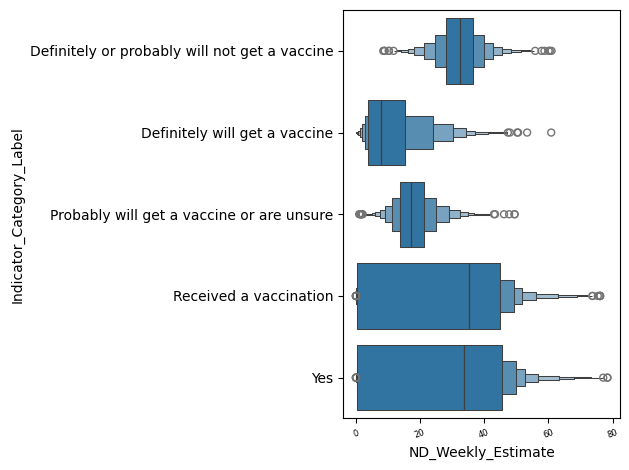

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.boxenplot(data=df, x='ND_Weekly_Estimate', y='Indicator_Category_Label', ax=ax)
plt.xticks(fontsize=6,rotation=20)
plt.tight_layout()
plt.show()

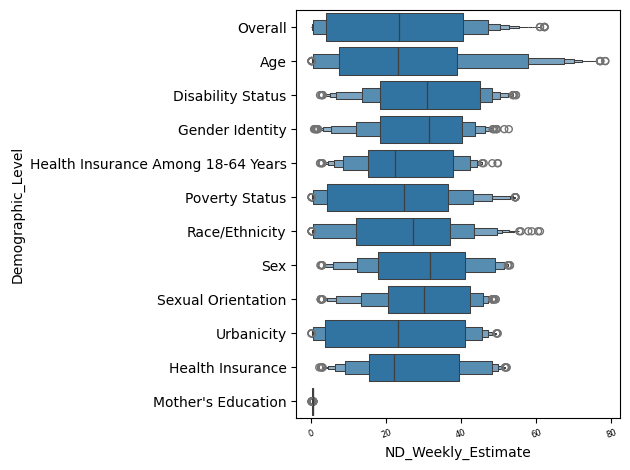

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.boxenplot(data=df, x='ND_Weekly_Estimate', y='Demographic_Level', ax=ax)
plt.xticks(fontsize=6,rotation=20)
plt.tight_layout()
plt.show()

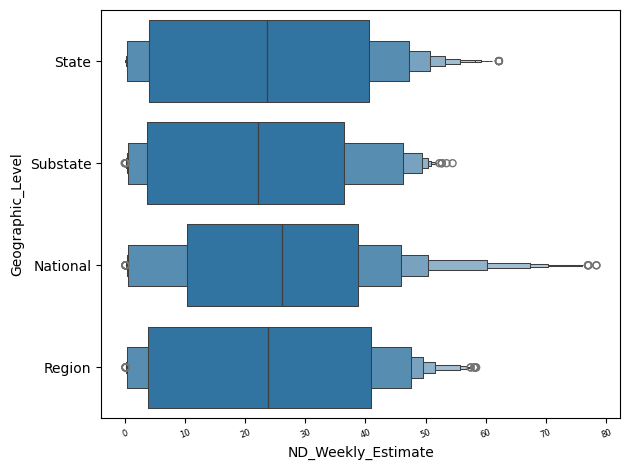

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.boxenplot(data=df, x='ND_Weekly_Estimate', y='Geographic_Level', ax=ax)
plt.xticks(fontsize=6,rotation=20)
plt.tight_layout()
plt.show()

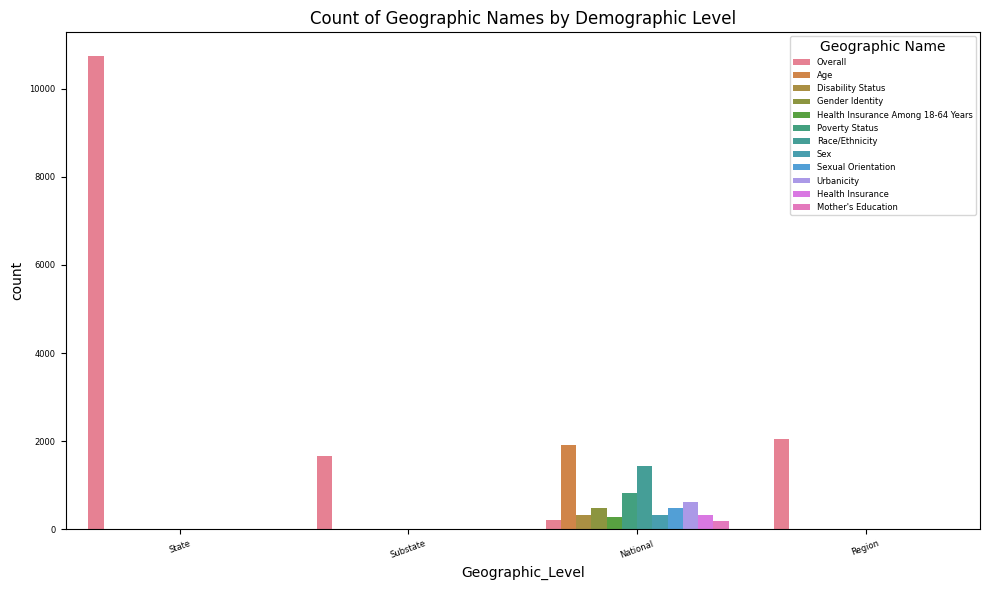

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Geographic_Level', hue='Demographic_Level')
plt.xticks(fontsize=6, rotation=20)
plt.yticks(fontsize=6)
plt.title('Count of Geographic Names by Demographic Level')
plt.legend(title='Geographic Name', fontsize=6)
plt.tight_layout()
plt.show()

In [115]:
df['Demographic_Name'].unique()

array(['18+ years', '18-29 years', '18-49 years', '30-39 years',
       '40-49 years', '50-64 years', '60+ years', '65+ years',
       '65-74 years', '75+ years', 'No', 'Yes', 'Cisgender', 'Uninsured',
       'Above Poverty, Income < $75k', 'Above Poverty, Income >= $75k',
       'Below Poverty', 'Poverty Status Unknown',
       'American Indian/Alaska Native, Non-Hispanic',
       'Asian, Non-Hispanic', 'Black, Non-Hispanic', 'Hispanic',
       'Multiple or Other Races, Non-Hispanic', 'Other, Non-Hispanic',
       'Pacific Islander/Native Hawaiian, Non-Hispanic',
       'White, Non-Hispanic', 'Female', 'Male', "Don't Know/Refused",
       'Gay/Lesbian/Bisexual/Other', 'Straight', 'Rural (Non-MSA)',
       'Suburban (MSA Non-Principal City)', 'Urban (MSA Principal City)',
       'Transgender/Nonbinary', 'Insured', '6 months-4 years',
       '6-23 months', '>= College degree', 'High school or equivalent',
       'Less than high school', 'Overall', '12-17 years', '13-17 years',
       '5

In [116]:
df['Current_Season_Week_Ending'].unique()

array(['01/27/2024 12:00:00 AM', '02/03/2024 12:00:00 AM',
       '01/06/2024 12:00:00 AM', '01/13/2024 12:00:00 AM',
       '01/20/2024 12:00:00 AM', '11/18/2023 12:00:00 AM',
       '11/25/2023 12:00:00 AM', '12/02/2023 12:00:00 AM',
       '10/07/2023 12:00:00 AM', '10/14/2023 12:00:00 AM',
       '10/21/2023 12:00:00 AM', '10/28/2023 12:00:00 AM',
       '11/04/2023 12:00:00 AM', '11/11/2023 12:00:00 AM',
       '09/30/2023 12:00:00 AM', '12/16/2023 12:00:00 AM',
       '02/10/2024 12:00:00 AM', '12/09/2023 12:00:00 AM',
       '03/16/2024 12:00:00 AM', '04/13/2024 12:00:00 AM',
       '12/23/2023 12:00:00 AM', '12/30/2023 12:00:00 AM',
       '05/11/2024 12:00:00 AM', '06/15/2024 12:00:00 AM',
       '03/02/2024 12:00:00 AM', '02/17/2024 12:00:00 AM',
       '03/09/2024 12:00:00 AM', '02/24/2024 12:00:00 AM',
       '03/31/2024 12:00:00 AM', '05/04/2024 12:00:00 AM',
       '03/23/2024 12:00:00 AM', '04/20/2024 12:00:00 AM',
       '04/06/2024 12:00:00 AM', '04/27/2024 12:00:00 AM

In [117]:
df.shape

(21795, 24)

In [118]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                     0
Geographic_Name                      0
Demographic_Level                    0
Demographic_Name                     0
Indicator_Label                      0
Indicator_Category_Label             0
Month_Week                           0
Week_Ending                      17533
ND_Weekly_Estimate                 287
CI_Half_width_95pct                287
n_unweighted                        14
Suppression_Flag                     8
Current_Season_Week_Ending           0
Influenza_Season                     0
Legend                               0
95 CI (%)                           93
Indicator_Category_Label_Sort     8516
Demographic_Level_Sort               0
Demographic_Name_Sort                0
Geographic_Sort                      0
Season_Sort                          0
Legend_Sort                          0
n_weighted                       17533
geography_name_order             17533
dtype: int64


In [119]:
df.shape

(21795, 24)

In [120]:
df.dropna(subset=['95 CI (%)'], inplace=True)

In [121]:
print(np.sum(df['95 CI (%)'].isnull(), axis=0))

0


In [122]:
df.shape

(21702, 24)

In [123]:
n_mean = df['n_unweighted'].mean()
df['n_unweighted'].fillna(value=n_mean, inplace=True)

C:\Users\sabas\AppData\Local\Temp\ipykernel_28404\2153505924.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [124]:
print(np.sum(df['n_unweighted'].isnull(), axis=0))

0


In [125]:
nd_mean = df['ND_Weekly_Estimate'].mean()
df['ND_Weekly_Estimate'].fillna(value=nd_mean, inplace=True)
print(np.sum(df['ND_Weekly_Estimate'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_28404\2882510942.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [126]:
suppression_mean = df['Suppression_Flag'].mean()
df['Suppression_Flag'].fillna(value=suppression_mean, inplace=True)
print(np.sum(df['Suppression_Flag'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_28404\1402633656.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [127]:
ci_half_width_mean = df['CI_Half_width_95pct'].mean()
df['CI_Half_width_95pct'].fillna(value=ci_half_width_mean, inplace=True)
print(np.sum(df['CI_Half_width_95pct'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_28404\3775633255.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [128]:
df['Indicator_Category_Label_Sort'].fillna(value=0, inplace=True)
print(np.sum(df['Indicator_Category_Label_Sort'].isnull(), axis=0))

0


C:\Users\sabas\AppData\Local\Temp\ipykernel_28404\1300723985.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [129]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                     0
Geographic_Name                      0
Demographic_Level                    0
Demographic_Name                     0
Indicator_Label                      0
Indicator_Category_Label             0
Month_Week                           0
Week_Ending                      17440
ND_Weekly_Estimate                   0
CI_Half_width_95pct                  0
n_unweighted                         0
Suppression_Flag                     0
Current_Season_Week_Ending           0
Influenza_Season                     0
Legend                               0
95 CI (%)                            0
Indicator_Category_Label_Sort        0
Demographic_Level_Sort               0
Demographic_Name_Sort                0
Geographic_Sort                      0
Season_Sort                          0
Legend_Sort                          0
n_weighted                       17440
geography_name_order             17440
dtype: int64


In [130]:
df.head()

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,...,Legend,95 CI (%),Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.8,7.8784,...,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,4.0,1,1,14,3,3140101,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.8,4.1669,...,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,2.0,1,1,14,3,3140101,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.3,7.6134,...,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,3.0,1,1,14,3,3140101,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,1.0,1,1,14,3,3140101,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.1,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,0.0,1,1,14,3,3140101,NaN,NaN


In [131]:
df = df.drop(columns=['Week_Ending','n_weighted','geography_name_order'])

In [132]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                 0
Geographic_Name                  0
Demographic_Level                0
Demographic_Name                 0
Indicator_Label                  0
Indicator_Category_Label         0
Month_Week                       0
ND_Weekly_Estimate               0
CI_Half_width_95pct              0
n_unweighted                     0
Suppression_Flag                 0
Current_Season_Week_Ending       0
Influenza_Season                 0
Legend                           0
95 CI (%)                        0
Indicator_Category_Label_Sort    0
Demographic_Level_Sort           0
Demographic_Name_Sort            0
Geographic_Sort                  0
Season_Sort                      0
Legend_Sort                      0
dtype: int64


In [133]:
df['Age_Group'] = df['Demographic_Name'].where(df['Demographic_Name'].str.contains('years'))
df.columns

Index(['Geographic_Level', 'Geographic_Name', 'Demographic_Level',
       'Demographic_Name', 'Indicator_Label', 'Indicator_Category_Label',
       'Month_Week', 'ND_Weekly_Estimate', 'CI_Half_width_95pct',
       'n_unweighted', 'Suppression_Flag', 'Current_Season_Week_Ending',
       'Influenza_Season', 'Legend', '95 CI (%)',
       'Indicator_Category_Label_Sort', 'Demographic_Level_Sort',
       'Demographic_Name_Sort', 'Geographic_Sort', 'Season_Sort',
       'Legend_Sort', 'Age_Group'],
      dtype='object')

In [134]:
df['Age_Group'].unique()

array(['18+ years', '18-29 years', '18-49 years', '30-39 years',
       '40-49 years', '50-64 years', '60+ years', '65+ years',
       '65-74 years', '75+ years', nan, '6 months-4 years', '12-17 years',
       '13-17 years', '5-11 years', '5-12 years', '5-17 years'],
      dtype=object)

In [135]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

Geographic_Level                    0
Geographic_Name                     0
Demographic_Level                   0
Demographic_Name                    0
Indicator_Label                     0
Indicator_Category_Label            0
Month_Week                          0
ND_Weekly_Estimate                  0
CI_Half_width_95pct                 0
n_unweighted                        0
Suppression_Flag                    0
Current_Season_Week_Ending          0
Influenza_Season                    0
Legend                              0
95 CI (%)                           0
Indicator_Category_Label_Sort       0
Demographic_Level_Sort              0
Demographic_Name_Sort               0
Geographic_Sort                     0
Season_Sort                         0
Legend_Sort                         0
Age_Group                        8529
dtype: int64


In [136]:
df['Age_Group'] = df['Age_Group'].fillna(0)
df['Age_Group'] = df['Age_Group'].replace({
    '6 months-4 years': 1,
    '5-11 years': 2,
    '5-12 years': 3,
    '5-17 years' : 4,
    '12-17 years' : 5,
    '13-17 years' : 6,
    '18+ years' : 7,
    '18-29 years' : 8,
    '18-49 years' : 9,
    '30-39 years' : 10,
    '40-49 years' : 11,
    '50-64 years' : 12,
    '60+ years' : 13,
    '65+ years' : 14,
    '65-74 years' : 15,
    '75+ years' : 16
})

C:\Users\sabas\AppData\Local\Temp\ipykernel_28404\1211279866.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [137]:
df['Month_Week'].unique()

array(['January Week 4', 'February Week 1', 'January Week 1',
       'January Week 2', 'January Week 3', 'November Week 3',
       'November Week 4', 'December Week 1', 'October Week 2',
       'October Week 3', 'October Week 4', 'October Week 5',
       'November Week 1', 'November Week 2', 'October Week 1', 'October',
       'November', 'December', 'February', 'December Week 2', 'March',
       'April', 'January', 'December Week 3', 'December Week 4',
       'December Week 5', 'May', 'June', 'March Week 1',
       'February Week 2', 'February Week 3', 'March Week 2',
       'March Week 3', 'February Week 4', 'March Week 5', 'May Week 1',
       'May Week 2', 'March Week 4', 'April Week 2', 'April Week 3',
       'April Week 1', 'April Week 4'], dtype=object)

In [138]:
df['Month'] = df['Month_Week'].str.extract(r'([A-Za-z]+)')[0]
df['Month'] = df['Month'].str.strip()
df['Month'].unique()

array(['January', 'February', 'November', 'December', 'October', 'March',
       'April', 'May', 'June'], dtype=object)

In [139]:
df['Month'] = df['Month'].replace({
    'January' : 1,
    'February' : 2,
    'November' : 11,
    'December' : 12,
    'October' : 10,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6
})

C:\Users\sabas\AppData\Local\Temp\ipykernel_28404\683800597.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [140]:
df['Geographic_Name'].unique()

array(['Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'Illinois-City of Chicago', 'Illinois-Rest of State',
       'New York-New York City', 'New York-Rest of State',
       'Pennsylvania-Philadelphia County', 'Pennsylvania-Rest of State',
       'Texas-Bexar County', 'Texas-City of Houston',
       'Texas-Rest of State', 'National', '

In [141]:
df['Demographic_Level'].value_counts()

Demographic_Level
Overall                               14585
Age                                    1905
Race/Ethnicity                         1418
Poverty Status                          816
Urbanicity                              612
Sexual Orientation                      477
Gender Identity                         473
Disability Status                       318
Sex                                     318
Health Insurance                        318
Health Insurance Among 18-64 Years      282
Mother's Education                      180
Name: count, dtype: int64

In [142]:
df['Geographic_Level'].value_counts()

Geographic_Level
State       10667
National     7321
Region       2040
Substate     1674
Name: count, dtype: int64

In [143]:
df['Age_Group'].value_counts()

Age_Group
7     11313
0      8529
12      318
14      159
16      159
8       159
15      159
13      159
11      159
10      159
9       159
1        45
5        45
6        45
2        45
3        45
4        45
Name: count, dtype: int64

In [144]:
df['Demographic_Name'].value_counts()

Demographic_Name
18+ years                                         11313
Overall                                            3272
50-64 years                                         318
Don't Know/Refused                                  314
Uninsured                                           300
Insured                                             300
Hispanic                                            204
Above Poverty, Income < $75k                        204
White, Non-Hispanic                                 204
Black, Non-Hispanic                                 204
Poverty Status Unknown                              204
Below Poverty                                       204
Above Poverty, Income >= $75k                       204
Rural (Non-MSA)                                     204
Suburban (MSA Non-Principal City)                   204
Urban (MSA Principal City)                          204
Other, Non-Hispanic                                 186
Gay/Lesbian/Bisexual/Other     

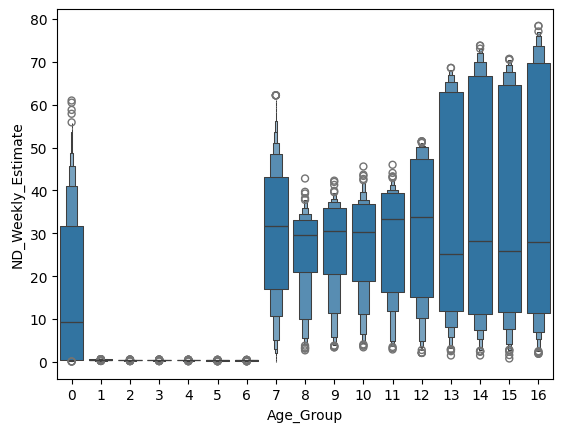

In [145]:
sns.boxenplot(data=df, x='Age_Group', y='ND_Weekly_Estimate')
plt.show()

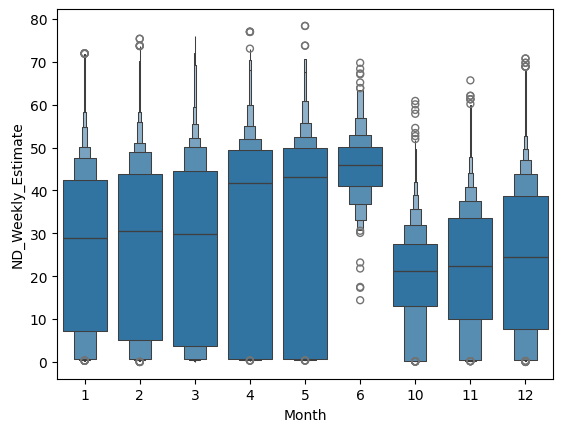

In [146]:
sns.boxenplot(data=df, x='Month', y='ND_Weekly_Estimate')
plt.show()

In [147]:
df_geographic_name = pd.get_dummies(df['Geographic_Name'], prefix='Geographic_Name_')
df = df.join(df_geographic_name)
df.drop(columns = 'Geographic_Name', inplace=True)

In [148]:
df_indicator_category_label = pd.get_dummies(df['Indicator_Category_Label'], prefix='Indicator_Category_Label_')
df = df.join(df_indicator_category_label)
df.drop(columns = 'Indicator_Category_Label', inplace=True)

In [149]:
df_demographic_name = pd.get_dummies(df['Demographic_Name'], prefix='Demographic_Name_')
df = df.join(df_demographic_name)
df.drop(columns = 'Demographic_Name', inplace=True)

In [150]:
df_influenza_season = pd.get_dummies(df['Influenza_Season'], prefix='Influenza_Season_')
df = df.join(df_influenza_season)
df.drop(columns = 'Influenza_Season', inplace=True)

In [151]:
feature_list = list(df.select_dtypes(include=['float64','boolean', 'int']).columns)
feature_list.remove('ND_Weekly_Estimate')
feature_list.remove('n_unweighted')
feature_list.remove('CI_Half_width_95pct')
feature_list.remove('Season_Sort')
feature_list.remove('Indicator_Category_Label_Sort')
feature_list.remove('Demographic_Name_Sort')
feature_list.remove('Geographic_Sort')
feature_list.remove('Legend_Sort')
feature_list.remove('Demographic_Name__Overall')
feature_list.remove('Demographic_Name__Yes')
feature_list.remove('Demographic_Level_Sort')
feature_list.remove('Suppression_Flag')
feature_list.remove('Indicator_Category_Label__Yes')

In [152]:
y = df['ND_Weekly_Estimate']
X = df[feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1234)


In [153]:
feature_list

['Age_Group',
 'Month',
 'Geographic_Name__Alabama',
 'Geographic_Name__Alaska',
 'Geographic_Name__Arizona',
 'Geographic_Name__Arkansas',
 'Geographic_Name__California',
 'Geographic_Name__Colorado',
 'Geographic_Name__Connecticut',
 'Geographic_Name__Delaware',
 'Geographic_Name__District of Columbia',
 'Geographic_Name__Florida',
 'Geographic_Name__Georgia',
 'Geographic_Name__Guam',
 'Geographic_Name__Hawaii',
 'Geographic_Name__Idaho',
 'Geographic_Name__Illinois',
 'Geographic_Name__Illinois-City of Chicago',
 'Geographic_Name__Illinois-Rest of State',
 'Geographic_Name__Indiana',
 'Geographic_Name__Iowa',
 'Geographic_Name__Kansas',
 'Geographic_Name__Kentucky',
 'Geographic_Name__Louisiana',
 'Geographic_Name__Maine',
 'Geographic_Name__Maryland',
 'Geographic_Name__Massachusetts',
 'Geographic_Name__Michigan',
 'Geographic_Name__Minnesota',
 'Geographic_Name__Mississippi',
 'Geographic_Name__Missouri',
 'Geographic_Name__Montana',
 'Geographic_Name__National',
 'Geographic_Na

In [154]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
predictions_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, predictions_dt)
r2_dt = r2_score(y_test, predictions_dt)
mse_dt = mean_squared_error(y_test, predictions_dt)
rmse_dt = root_mean_squared_error(y_test, predictions_dt)

In [155]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = root_mean_squared_error(y_test, predictions_rf)

In [156]:
print("Model Comparison:")
print(f"{'Metric':<15} {'Random Forest':<15} {'Decision Tree':<15}")
print(f"{'-'*45}")

print(f"{'MAE':<15} {mae_rf:<15.4f} {mae_dt:<15.4f}")
print(f"{'R² Score':<15} {r2_rf:<15.4f} {r2_dt:<15.4f}")
print(f"{'MSE':<15} {mse_rf:<15.4f} {mse_dt:<15.4f}")
print(f"{'RMSE':<15} {rmse_rf:<15.4f} {rmse_dt:<15.4f}")

Model Comparison:
Metric          Random Forest   Decision Tree  
---------------------------------------------
MAE             3.0535          3.1032         
R² Score        0.8787          0.8746         
MSE             39.2080         40.5117        
RMSE            6.2616          6.3649         


In [157]:
df_pred_test = pd.DataFrame()

In [158]:
df_pred_test['ND_Weekly_Estimate'] = y_test

In [159]:
df_pred_test['Predictions_DT'] = predictions_dt

In [160]:
df_pred_test['Predictions_RF'] = predictions_rf

In [161]:
df_pred_test.head()

,ND_Weekly_Estimate,Predictions_DT,Predictions_RF
12897,39.8,39.80,39.791000
14175,38.1,37.70,37.784467
11384,48.1,48.15,48.161181
4552,28.4,28.75,28.911959
16788,3.7,3.45,3.413937


In [162]:
forest_importances = rf_model.feature_importances_

C:\Users\sabas\AppData\Local\Temp\ipykernel_28404\1113225840.py:8: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



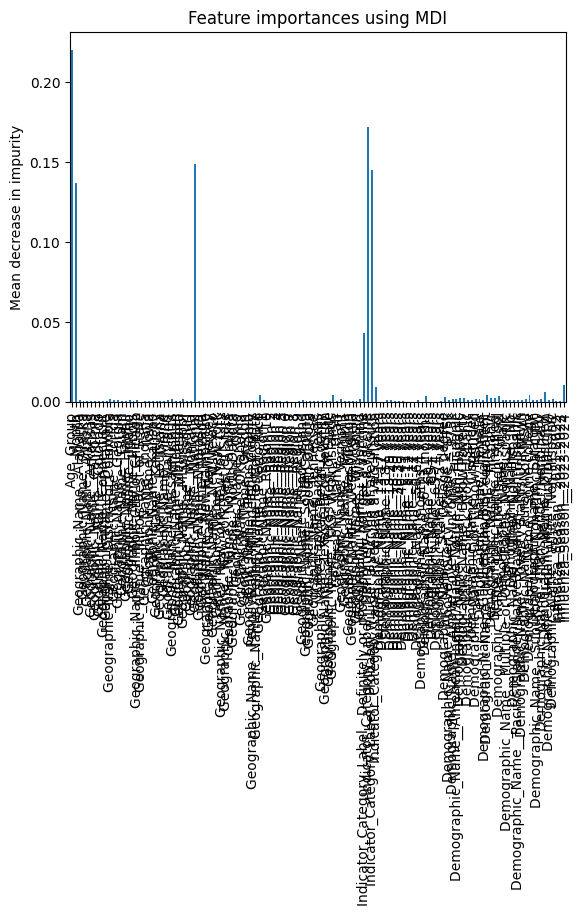

In [163]:
forest_importances_series = pd.Series(forest_importances, index=feature_list)
std = np.std([rf_model.feature_importances_ for tree in rf_model.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances_series.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [164]:
df_features_imp = pd.DataFrame()

In [165]:
df_features_imp['DT_importances'] = dt_model.feature_importances_

In [166]:
df_features_imp['RF_importances'] = rf_model.feature_importances_

In [167]:
df_features_imp['Feature_list'] = feature_list

In [168]:
df_features_imp.head()

,DT_importances,RF_importances,Feature_list
0,0.220953,0.220299,Age_Group
1,0.134953,0.136847,Month
2,0.000816,0.000869,Geographic_Name__Alabama
3,0.000651,0.000759,Geographic_Name__Alaska
4,0.000416,0.000447,Geographic_Name__Arizona


In [169]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
predictions_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)
mse_lr = mean_squared_error(y_test, predictions_lr)
rmse_lr = root_mean_squared_error(y_test, predictions_lr)

In [170]:
print("Model Comparison:")
print(f"{'Metric':<15} {'Random Forest':<15} {'Decision Tree':<15} {'Linear Regression':<15}")
print(f"{'-'*60}")

print(f"{'MAE':<15} {mae_rf:<15.4f} {mae_dt:<15.4f} {mae_lr:<15.4f}")
print(f"{'R² Score':<15} {r2_rf:<15.4f} {r2_dt:<15.4f} {r2_lr:<15.4f}")
print(f"{'MSE':<15} {mse_rf:<15.4f} {mse_dt:<15.4f} {mse_lr:<15.4f}")
print(f"{'RMSE':<15} {rmse_rf:<15.4f} {rmse_dt:<15.4f} {rmse_lr:<15.4f}")

Model Comparison:
Metric          Random Forest   Decision Tree   Linear Regression
------------------------------------------------------------
MAE             3.0535          3.1032          7.8499         
R² Score        0.8787          0.8746          0.6558         
MSE             39.2080         40.5117         111.2272       
RMSE            6.2616          6.3649          10.5464        


In [171]:
en_model = ElasticNet()
en_model.fit(X_train, y_train)
predictions_en = en_model.predict(X_test)
mae_en = mean_absolute_error(y_test, predictions_en)
r2_en = r2_score(y_test, predictions_en)
mse_en = mean_squared_error(y_test, predictions_en)
rmse_en = np.sqrt(mse_en)

In [172]:
print("Model Comparison:")
print(f"{'Metric':<15} {'Random Forest':<15} {'Decision Tree':<15} {'Linear Regression':<15} {'Elastic Net':<15}")
print(f"{'-'*75}")

print(f"{'MAE':<15} {mae_rf:<15.4f} {mae_dt:<15.4f} {mae_lr:<15.4f} {mae_en:<15.4f}")
print(f"{'R² Score':<15} {r2_rf:<15.4f} {r2_dt:<15.4f} {r2_lr:<15.4f} {r2_en:<15.4f}")
print(f"{'MSE':<15} {mse_rf:<15.4f} {mse_dt:<15.4f} {mse_lr:<15.4f} {mse_en:<15.4f}")
print(f"{'RMSE':<15} {rmse_rf:<15.4f} {rmse_dt:<15.4f} {rmse_lr:<15.4f} {rmse_en:<15.4f}")

Model Comparison:
Metric          Random Forest   Decision Tree   Linear Regression Elastic Net    
---------------------------------------------------------------------------
MAE             3.0535          3.1032          7.8499          13.7854        
R² Score        0.8787          0.8746          0.6558          0.2310         
MSE             39.2080         40.5117         111.2272        248.4803       
RMSE            6.2616          6.3649          10.5464         15.7633        


In [173]:
df_pred_test['Predictions_LR'] = predictions_lr
df_pred_test['Predictions_EN'] = predictions_en

In [174]:
df_pred_test.head(10)

,ND_Weekly_Estimate,Predictions_DT,Predictions_RF,Predictions_LR,Predictions_EN
12897,39.800,39.800,39.791000,39.875000,31.515901
14175,38.100,37.700,37.784467,37.312500,38.108519
11384,48.100,48.150,48.161181,37.414062,30.220792
4552,28.400,28.750,28.911959,36.414062,16.426923
16788,3.700,3.450,3.413937,12.843750,27.715111
2666,24.700,22.900,21.492946,8.062500,15.041673
15120,52.100,52.100,51.902214,38.273438,29.248321
12383,41.000,41.225,41.240811,36.531250,19.507934
10964,49.300,49.300,49.306867,39.453125,30.220792
18207,0.356,0.356,1.308893,2.218750,14.250730


In [175]:
lr_coef = lr_model.coef_
importance_df_lr = pd.DataFrame({'Feature': feature_list, 'Coefficient': lr_coef})
importance_df_lr['Absolute Coefficient'] = importance_df_lr['Coefficient'].abs()
importance_df = importance_df_lr.sort_values(by='Absolute Coefficient', ascending=False)
importance_df

,Feature,Coefficient,Absolute Coefficient
128,Influenza_Season__2023-2024,-4.464224e+13,4.464224e+13
126,Influenza_Season__2021-2022,-4.464224e+13,4.464224e+13
127,Influenza_Season__2022-2023,-4.464224e+13,4.464224e+13
96,Demographic_Name__75+ years,1.938736e+13,1.938736e+13
95,Demographic_Name__65-74 years,1.817565e+13,1.817565e+13
...,...,...,...
102,Demographic_Name__Below Poverty,7.655334e+00,7.655334e+00
109,Demographic_Name__Hispanic,7.622040e+00,7.622040e+00
76,Indicator_Category_Label__Definitely or probab...,-3.680420e+00,3.680420e+00
79,Indicator_Category_Label__Received a vaccination,1.783844e+00,1.783844e+00


In [176]:
en_coef = en_model.coef_
importance_df_en = pd.DataFrame({'Feature': feature_list, 'Coefficient': en_coef})
importance_df_en['Absolute Coefficient'] = importance_df_en['Coefficient'].abs()
importance_df_en = importance_df_en.sort_values(by='Absolute Coefficient', ascending=False)
importance_df_en

,Feature,Coefficient,Absolute Coefficient
77,Indicator_Category_Label__Definitely will get ...,-2.505681,2.505681
0,Age_Group,1.602556,1.602556
32,Geographic_Name__National,1.367320,1.367320
128,Influenza_Season__2023-2024,-1.225467,1.225467
78,Indicator_Category_Label__Probably will get a ...,-1.062613,1.062613
...,...,...,...
40,Geographic_Name__New York-Rest of State,-0.000000,0.000000
39,Geographic_Name__New York-New York City,-0.000000,0.000000
38,Geographic_Name__New York,-0.000000,0.000000
37,Geographic_Name__New Mexico,-0.000000,0.000000


In [177]:
df_features_imp['LR_importances'] = importance_df_lr['Coefficient']
df_features_imp['EN_importances'] = importance_df_en['Coefficient']

In [178]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_features_imp['Feature_list'],
    y=df_features_imp['LR_importances'],
    mode='markers',
    name='Linear Regression',
    marker=dict(color='red', symbol='circle'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=df_features_imp['Feature_list'],
    y=df_features_imp['EN_importances'],
    mode='markers',
    name='Elastic Net',
    marker=dict(color='blue', symbol='x'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=df_features_imp['Feature_list'],
    y=df_features_imp['RF_importances'],
    mode='markers',
    name='Random Forest',
    marker=dict(color='green', symbol='square'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=df_features_imp['Feature_list'],
    y=df_features_imp['DT_importances'],
    mode='markers',
    name='Decision Tree',
    marker=dict(color='orange', symbol='diamond'),
    showlegend=True
))

fig.update_layout(
    title='Feature Importances Comparison: LR, EN, RF, and DT',
    xaxis_title='Features',
    yaxis_title='Importance',
    xaxis_tickangle=-45,
    legend_title_text='Models',
    template='plotly_white'
)

fig.show()

In [179]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test,
    y=predictions_lr,
    mode='markers',
    name='Linear Regression Predictions',
    marker=dict(color='red', symbol='x')
))

fig.add_trace(go.Scatter(
    x=y_test,
    y=predictions_dt,
    mode='markers',
    name='Decision Tree Predictions',
    marker=dict(color='green', symbol='circle')
))

fig.add_trace(go.Scatter(
    x=y_test,
    y=predictions_rf,
    mode='markers',
    name='Random Forest Predictions',
    marker=dict(color='orange', symbol='square')
))

fig.add_trace(go.Scatter(
    x=y_test,
    y=predictions_en,
    mode='markers',
    name='Elastic Net Predictions',
    marker=dict(color='purple', symbol='diamond')
))

max_value = max(y_test.max(), predictions_lr.max(), predictions_dt.max(), predictions_rf.max(), predictions_en.max())
min_value = min(y_test.min(), predictions_lr.min(), predictions_dt.min(), predictions_rf.min(), predictions_en.min())

fig.add_trace(go.Scatter(
    x=[min_value, max_value],
    y=[min_value, max_value],
    mode='lines',
    name='Perfect Prediction Line',
    line=dict(color='black', dash='dash')
))

fig.update_layout(
    xaxis_title='Actual Values (y_test)',
    yaxis_title='Predicted Values',
    title='Model Predictions Comparison',
    legend_title_text='Models',
    template='plotly_white'
)

fig.show()

In [180]:
df_features_imp.sort_values(by="DT_importances", ascending=False)

,DT_importances,RF_importances,Feature_list,LR_importances,EN_importances
0,2.209529e-01,2.202992e-01,Age_Group,-1.211710e+12,1.602556
77,1.768284e-01,1.719276e-01,Indicator_Category_Label__Definitely will get ...,-2.500378e+01,-2.505681
32,1.508125e-01,1.485736e-01,Geographic_Name__National,4.171005e+11,1.367320
78,1.487324e-01,1.450426e-01,Indicator_Category_Label__Probably will get a ...,-1.812112e+01,-1.062613
1,1.349529e-01,1.368475e-01,Month,-3.339844e-01,-0.486235
...,...,...,...,...,...
81,3.027743e-10,4.622829e-10,Demographic_Name__13-17 years,7.270259e+12,-0.000000
88,1.731303e-10,2.183106e-10,Demographic_Name__5-12 years,3.635130e+12,-0.000000
87,6.226637e-11,2.806374e-10,Demographic_Name__5-11 years,2.423420e+12,-0.000000
80,2.109719e-11,2.965095e-10,Demographic_Name__12-17 years,6.058549e+12,-0.000000


In [181]:
df_features_imp.sort_values(by="RF_importances", ascending=False)

,DT_importances,RF_importances,Feature_list,LR_importances,EN_importances
0,2.209529e-01,2.202992e-01,Age_Group,-1.211710e+12,1.602556
77,1.768284e-01,1.719276e-01,Indicator_Category_Label__Definitely will get ...,-2.500378e+01,-2.505681
32,1.508125e-01,1.485736e-01,Geographic_Name__National,4.171005e+11,1.367320
78,1.487324e-01,1.450426e-01,Indicator_Category_Label__Probably will get a ...,-1.812112e+01,-1.062613
1,1.349529e-01,1.368475e-01,Month,-3.339844e-01,-0.486235
...,...,...,...,...,...
89,0.000000e+00,1.271058e-09,Demographic_Name__5-17 years,4.846840e+12,-0.000000
81,3.027743e-10,4.622829e-10,Demographic_Name__13-17 years,7.270259e+12,-0.000000
80,2.109719e-11,2.965095e-10,Demographic_Name__12-17 years,6.058549e+12,-0.000000
87,6.226637e-11,2.806374e-10,Demographic_Name__5-11 years,2.423420e+12,-0.000000


In [182]:
df_features_imp.sort_values(by="LR_importances", ascending=False)

,DT_importances,RF_importances,Feature_list,LR_importances,EN_importances
96,0.000336,0.000211,Demographic_Name__75+ years,1.938736e+13,-0.000000
95,0.000021,0.000045,Demographic_Name__65-74 years,1.817565e+13,-0.000000
94,0.000074,0.000071,Demographic_Name__65+ years,1.696394e+13,-0.000000
93,0.000015,0.000084,Demographic_Name__60+ years,1.575223e+13,-0.000000
90,0.001931,0.001086,Demographic_Name__50-64 years,1.454052e+13,-0.000000
...,...,...,...,...,...
77,0.176828,0.171928,Indicator_Category_Label__Definitely will get ...,-2.500378e+01,-2.505681
0,0.220953,0.220299,Age_Group,-1.211710e+12,1.602556
127,0.000278,0.000270,Influenza_Season__2022-2023,-4.464224e+13,0.188444
126,0.000287,0.000272,Influenza_Season__2021-2022,-4.464224e+13,0.037022


In [183]:
df_features_imp.sort_values(by="EN_importances", ascending=False)

,DT_importances,RF_importances,Feature_list,LR_importances,EN_importances
0,0.220953,0.220299,Age_Group,-1.211710e+12,1.602556
32,0.150813,0.148574,Geographic_Name__National,4.171005e+11,1.367320
82,0.002012,0.001307,Demographic_Name__18+ years,8.481969e+12,0.862288
79,0.007758,0.009504,Indicator_Category_Label__Received a vaccination,1.783844e+00,0.808873
76,0.044818,0.043088,Indicator_Category_Label__Definitely or probab...,-3.680420e+00,0.518770
...,...,...,...,...,...
5,0.000300,0.000382,Geographic_Name__Arkansas,4.171005e+11,-0.000000
1,0.134953,0.136847,Month,-3.339844e-01,-0.486235
78,0.148732,0.145043,Indicator_Category_Label__Probably will get a ...,-1.812112e+01,-1.062613
128,0.010421,0.010221,Influenza_Season__2023-2024,-4.464224e+13,-1.225467


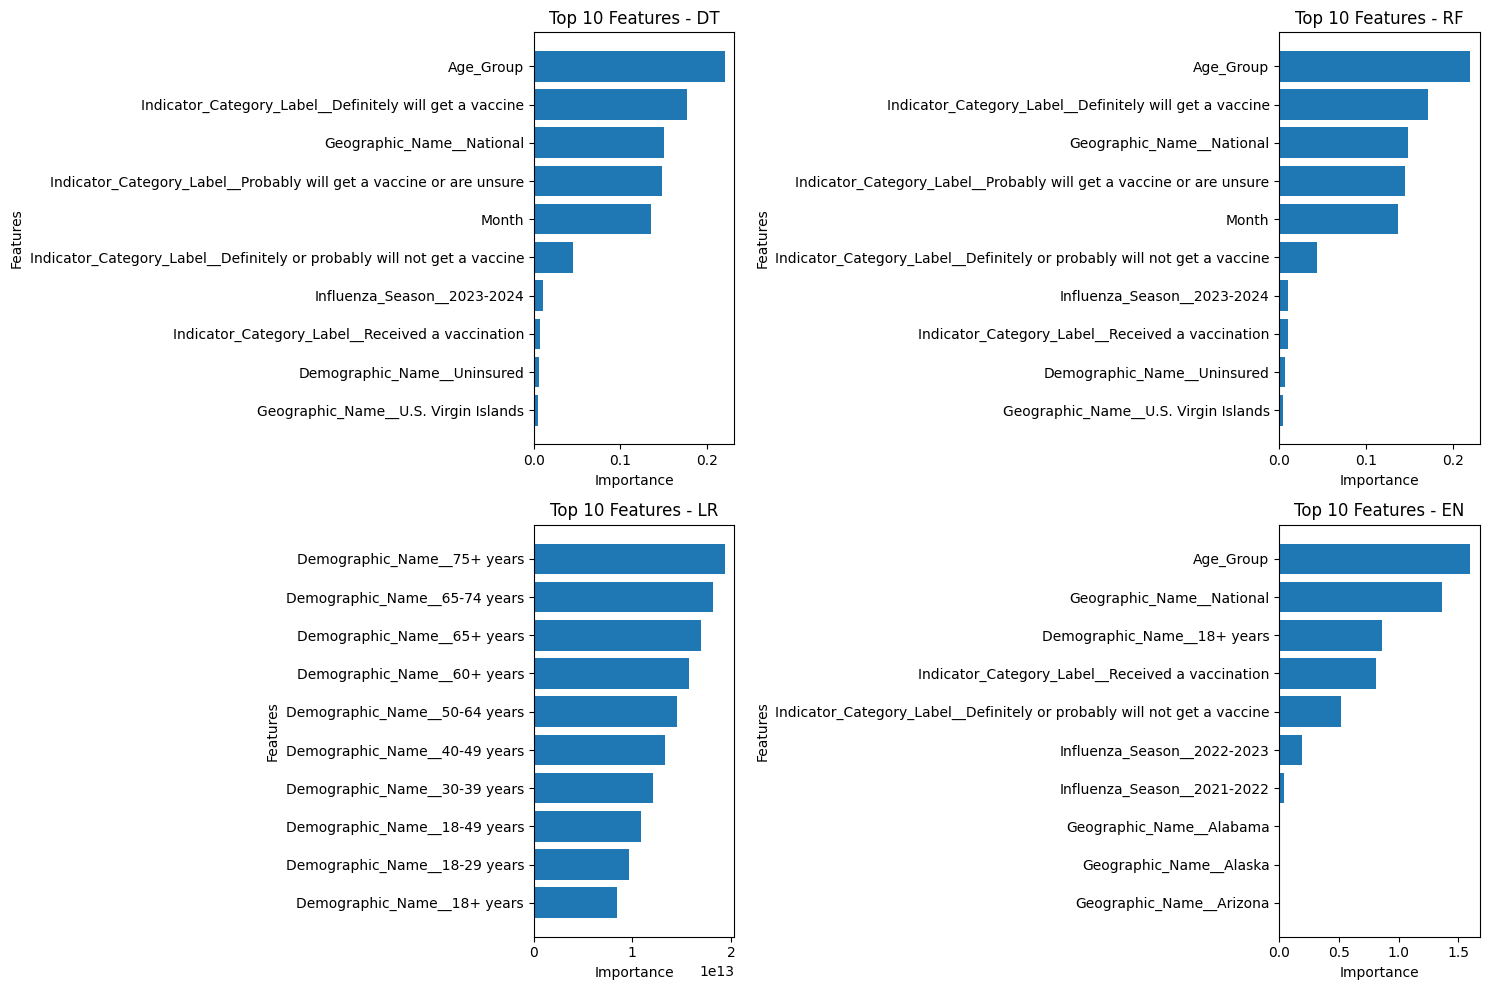

Top Features List:
DT: ['Age_Group', 'Indicator_Category_Label__Definitely will get a vaccine', 'Geographic_Name__National', 'Indicator_Category_Label__Probably will get a vaccine or are unsure', 'Month', 'Indicator_Category_Label__Definitely or probably will not get a vaccine', 'Influenza_Season__2023-2024', 'Indicator_Category_Label__Received a vaccination', 'Demographic_Name__Uninsured', 'Geographic_Name__U.S. Virgin Islands']
RF: ['Age_Group', 'Indicator_Category_Label__Definitely will get a vaccine', 'Geographic_Name__National', 'Indicator_Category_Label__Probably will get a vaccine or are unsure', 'Month', 'Indicator_Category_Label__Definitely or probably will not get a vaccine', 'Influenza_Season__2023-2024', 'Indicator_Category_Label__Received a vaccination', 'Demographic_Name__Uninsured', 'Geographic_Name__U.S. Virgin Islands']
LR: ['Demographic_Name__75+ years', 'Demographic_Name__65-74 years', 'Demographic_Name__65+ years', 'Demographic_Name__60+ years', 'Demographic_Name__5

In [184]:
models = ['DT_importances', 'RF_importances', 'LR_importances', 'EN_importances']
num_features = 10
top_features_list = {}

plt.figure(figsize=(15, 10))

for i, model in enumerate(models):
    top_features = df_features_imp.nlargest(num_features, model)
    
    top_features_list[model] = top_features['Feature_list'].tolist()
    
    plt.subplot(2, 2, i + 1) 
    plt.barh(top_features['Feature_list'], top_features[model])
    plt.title(f'Top 10 Features - {model[:-12]}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print("Top Features List:")
for model, features in top_features_list.items():
    print(f"{model[:-12]}: {features}")

In [185]:
df_pred_test['Error_LR'] = abs(df_pred_test['Predictions_LR'] - df_pred_test['ND_Weekly_Estimate'])
df_pred_test['Error_DT'] = abs(df_pred_test['Predictions_DT'] - df_pred_test['ND_Weekly_Estimate'])
df_pred_test['Error_RF'] = abs(df_pred_test['Predictions_RF'] - df_pred_test['ND_Weekly_Estimate'])
df_pred_test['Error_EN'] = abs(df_pred_test['Predictions_EN'] - df_pred_test['ND_Weekly_Estimate'])

worst_performers_dt = df_pred_test.nlargest(10, 'Error_DT')
worst_performers_rf = df_pred_test.nlargest(10, 'Error_RF')
worst_performers_lr = df_pred_test.nlargest(10, 'Error_LR')
worst_performers_en = df_pred_test.nlargest(10, 'Error_EN')

columns_to_display = ['ND_Weekly_Estimate', 'Predictions_DT', 'Predictions_RF', 'Predictions_LR', 'Predictions_EN']

with pd.option_context('display.width', 1000):
    print("Worst Performing Data Points for DT:")
    print(worst_performers_dt[columns_to_display])

    print("\nWorst Performing Data Points for RF:")
    print(worst_performers_rf[columns_to_display])

    print("\nWorst Performing Data Points for LR:")
    print(worst_performers_lr[columns_to_display])

    print("\nWorst Performing Data Points for EN:")
    print(worst_performers_en[columns_to_display])

Worst Performing Data Points for DT:
       ND_Weekly_Estimate  Predictions_DT  Predictions_RF  Predictions_LR  Predictions_EN
21629               0.567       54.233333       53.173082       32.289062       19.021698
21451               0.567       54.233333       53.173082       32.289062       19.021698
21492               0.567       54.233333       53.173082       32.289062       19.021698
21736               0.568       54.233333       53.173082       32.289062       19.021698
14995              46.100        0.515000        2.116412       27.851562       18.535463
15050              46.100        0.515000        2.116412       27.851562       18.535463
11634              47.900        9.671800        9.682948       30.140625       15.940688
10336              47.700        9.671800        9.682948       30.140625       15.940688
21307               0.573       36.524333       37.211656       31.953125       18.535463
7227               45.600        9.671800        9.682948      

In [186]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=worst_performers_dt['ND_Weekly_Estimate'],
    y=worst_performers_dt['Predictions_DT'],
    mode='markers',
    name='Decision Tree Predictions',
    marker=dict(color='green', symbol='circle')
))

fig.add_trace(go.Scatter(
    x=worst_performers_rf['ND_Weekly_Estimate'],
    y=worst_performers_rf['Predictions_RF'],
    mode='markers',
    name='Random Forest Predictions',
    marker=dict(color='orange', symbol='square')
))

fig.add_trace(go.Scatter(
    x=worst_performers_lr['ND_Weekly_Estimate'],
    y=worst_performers_lr['Predictions_LR'],
    mode='markers',
    name='Linear Regression Predictions',
    marker=dict(color='red', symbol='x')
))

fig.add_trace(go.Scatter(
    x=worst_performers_en['ND_Weekly_Estimate'],
    y=worst_performers_en['Predictions_EN'],
    mode='markers',
    name='Elastic Net Predictions',
    marker=dict(color='purple', symbol='diamond')
))

max_value = max(
    worst_performers_dt['ND_Weekly_Estimate'].max(),
    worst_performers_rf['ND_Weekly_Estimate'].max(),
    worst_performers_lr['ND_Weekly_Estimate'].max(),
    worst_performers_en['ND_Weekly_Estimate'].max(),
    worst_performers_dt['Predictions_DT'].max(),
    worst_performers_rf['Predictions_RF'].max(),
    worst_performers_lr['Predictions_LR'].max(),
    worst_performers_en['Predictions_EN'].max()
)

min_value = min(
    worst_performers_dt['ND_Weekly_Estimate'].min(),
    worst_performers_rf['ND_Weekly_Estimate'].min(),
    worst_performers_lr['ND_Weekly_Estimate'].min(),
    worst_performers_en['ND_Weekly_Estimate'].min(),
    worst_performers_dt['Predictions_DT'].min(),
    worst_performers_rf['Predictions_RF'].min(),
    worst_performers_lr['Predictions_LR'].min(),
    worst_performers_en['Predictions_EN'].min()
)

fig.add_trace(go.Scatter(
    x=[min_value, max_value],
    y=[min_value, max_value],
    mode='lines',
    name='Perfect Prediction Line',
    line=dict(color='black', dash='dash')
))

fig.update_layout(
    xaxis_title='Actual Values (ND Weekly Estimate)',
    yaxis_title='Predicted Values',
    title='Worst Performing Model Predictions Comparison',
    legend_title_text='Models',
    template='plotly_white'
)

fig.show()

In [187]:
columns_to_display = ['ND_Weekly_Estimate', 'Predictions_DT', 'Predictions_RF', 'Predictions_LR', 'Predictions_EN']

def display_worst_performers(worst_performers, model_name):
    indices = worst_performers.index
    feature_values = X_test.loc[indices]
    combined_df = pd.concat([worst_performers[columns_to_display], feature_values], axis=1)
    with pd.option_context('display.width', 1000):
        print(f"Worst Performing Data Points for {model_name}:")
        print(combined_df)

display_worst_performers(worst_performers_dt, 'DT')
display_worst_performers(worst_performers_rf, 'RF')
display_worst_performers(worst_performers_lr, 'LR')
display_worst_performers(worst_performers_en, 'EN')


Worst Performing Data Points for DT:
       ND_Weekly_Estimate  Predictions_DT  Predictions_RF  Predictions_LR  Predictions_EN  Age_Group  Month  Geographic_Name__Alabama  Geographic_Name__Alaska  Geographic_Name__Arizona  ...  Demographic_Name__Some college  Demographic_Name__Straight  Demographic_Name__Suburban (MSA Non-Principal City)  Demographic_Name__Transgender/Nonbinary  Demographic_Name__Uninsured  Demographic_Name__Urban (MSA Principal City)  Demographic_Name__White, Non-Hispanic  Influenza_Season__2021-2022  Influenza_Season__2022-2023  Influenza_Season__2023-2024
21629               0.567       54.233333       53.173082       32.289062       19.021698          0      4                     False                    False                     False  ...                           False                       False                                              False                                      False                        False                                         False

In [188]:
best_performers_dt = df_pred_test.nsmallest(10, 'Error_DT')
best_performers_rf = df_pred_test.nsmallest(10, 'Error_RF')
best_performers_lr = df_pred_test.nsmallest(10, 'Error_LR')
best_performers_en = df_pred_test.nsmallest(10, 'Error_EN')
def display_best_performers(best_performers, model_name):
    indices = best_performers.index
    feature_values = X_test.loc[indices]
    combined_df = pd.concat([best_performers[columns_to_display], feature_values], axis=1)
    with pd.option_context('display.width', 1000):
        print(f"Best Performing Data Points for {model_name}:")
        print(combined_df)

display_best_performers(best_performers_dt, 'DT')
display_best_performers(best_performers_rf, 'RF')
display_best_performers(best_performers_lr, 'LR')
display_best_performers(best_performers_en, 'EN')

Best Performing Data Points for DT:
       ND_Weekly_Estimate  Predictions_DT  Predictions_RF  Predictions_LR  Predictions_EN  Age_Group  Month  Geographic_Name__Alabama  Geographic_Name__Alaska  Geographic_Name__Arizona  ...  Demographic_Name__Some college  Demographic_Name__Straight  Demographic_Name__Suburban (MSA Non-Principal City)  Demographic_Name__Transgender/Nonbinary  Demographic_Name__Uninsured  Demographic_Name__Urban (MSA Principal City)  Demographic_Name__White, Non-Hispanic  Influenza_Season__2021-2022  Influenza_Season__2022-2023  Influenza_Season__2023-2024
12897              39.800          39.800       39.791000       39.875000       31.515901          7      2                      True                    False                     False  ...                           False                       False                                              False                                      False                        False                                         False 